In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

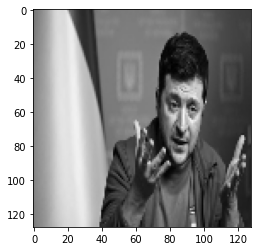

In [ ]:
path = '/content/drive/MyDrive/Vision lab/lab1/Zelenskyy.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128, 128))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
i_row_num, i_col_num = img.shape
print(i_row_num,i_col_num)

128 128


In [ ]:
kernel = np.array(([0,-1,0],[-1,5,-1],[0,-1,0]), np.float32)

In [ ]:
k_row_num, k_col_num = kernel.shape
print(k_row_num, k_col_num)

3 3


In [ ]:
op_row_num = i_row_num + k_row_num - 1
op_col_num = i_col_num + k_col_num - 1
print(op_row_num, op_col_num)

130 130


In [ ]:
k_zero_padded = np.pad(kernel, ((op_row_num - k_row_num, 0),
                       (0, op_col_num - k_col_num)),
                       'constant', constant_values = 0
                       )
print(k_zero_padded)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0. -1.  0. ...  0.  0.  0.]
 [-1.  5. -1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]]


In [ ]:
toeplitz_list = []

In [ ]:
from scipy.linalg.special_matrices import toeplitz
for i in range(k_zero_padded.shape[0]-1,-1,-1):
  c = k_zero_padded[i,:]
  r = np.r_[c[0], np.zeros(i_col_num-1)]
  toeplitz_m = toeplitz(c,r)
  toeplitz_list.append(toeplitz_m)
  print('K '+str(i)+'\n', toeplitz_m)

K 129
 [[ 0.  0.  0. ...  0.  0.  0.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0.  0.]]
K 128
 [[-1.  0.  0. ...  0.  0.  0.]
 [ 5. -1.  0. ...  0.  0.  0.]
 [-1.  5. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  5. -1.]
 [ 0.  0.  0. ...  0. -1.  5.]
 [ 0.  0.  0. ...  0.  0. -1.]]
K 127
 [[ 0.  0.  0. ...  0.  0.  0.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0.  0.]]
K 126
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
K 125
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
K 124
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0.

In [ ]:
c = range(1,k_zero_padded.shape[0]+1)
r = np.r_[c[0], np.zeros(i_row_num-1, dtype = int)]
doubly_indices = toeplitz(c,r)
print('doubly indices \n',doubly_indices)

doubly indices 
 [[  1   0   0 ...   0   0   0]
 [  2   1   0 ...   0   0   0]
 [  3   2   1 ...   0   0   0]
 ...
 [128 127 126 ...   3   2   1]
 [129 128 127 ...   4   3   2]
 [130 129 128 ...   5   4   3]]


In [ ]:
h = toeplitz_list[0].shape[0]*doubly_indices.shape[0]
w = toeplitz_list[0].shape[1]*doubly_indices.shape[1]
doubly_blocked_shape = [h,w]
doubly_blocked = np.zeros(doubly_blocked_shape)

In [ ]:
b_h, b_w = toeplitz_list[0].shape
for i in range(doubly_indices.shape[0]):
  for j in range(doubly_indices.shape[1]):
    start_i = i*b_h
    start_j = j*b_w
    end_i = start_i+b_h
    end_j = start_j + b_w
    doubly_blocked[start_i: end_i, start_j: end_j]=toeplitz_list[doubly_indices[i,j]-1]
print(doubly_blocked)
print(doubly_blocked.shape)

[[ 0.  0.  0. ...  0.  0.  0.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0.  0.]]
(16900, 16384)


In [ ]:
#input matrix to vector
def matrix_to_vector(input):
  input_h, input_w = input.shape
  output_vector = np.zeros(input_h*input_w, dtype = input.dtype)
  #flip the input matrix upside down to start from the last row
  input = np.flipud(input)
  for i, row in enumerate(input):
    st = i*input_w
    nd = st+input_w
    output_vector[st:nd]=row
  return output_vector

In [ ]:
vectorized_input = matrix_to_vector(img)
print(doubly_blocked.shape)
print(vectorized_input.shape)
print(vectorized_input)
result_vector = np.matmul(doubly_blocked, vectorized_input)
max_val = 255
print("result: ", result_vector)

(16900, 16384)
(16384,)
[123 127 131 ...  62  62  61]
result:  [   0. -123. -127. ...  -62.  -61.    0.]


In [ ]:
def vector_to_matrix(input, output_shape):
  output_h, output_w = output_shape
  output = np.zeros(output_shape, dtype=input.dtype)
  for i in range(output_h):
    st = i*output_w
    nd = st+output_w
    output[i,:] = input[st:nd]
  #flipping again downup
  output = np.flipud(output)
  return output
# out = vector_to_matrix(result_vector,  output_shape)/max_val

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


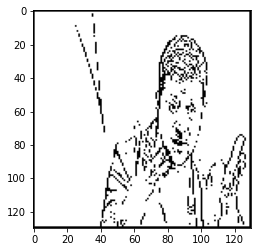

In [ ]:
from scipy import signal
result = signal.convolve2d(img, kernel, "full")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()